# Upper Confidence Bound (UCB)

## Importing the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [4]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [5]:
import math

In [6]:
N = 10000
d = 10
ads_selected = []                              # only one ad is selected at each round,so ads_selected gonna be the list of 10000 ads that gonna select at each round(10000)
numbers_of_selection = [0] * d                 # Each of any ad (out of 10) is gonna select at every round upto n rounds,therefore if 3rd ad is selected at some round then,list element 3rd = 1
sums_of_reward = [0] * d
total_reward = 0                               # initially total reward is zero
for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):
    if (numbers_of_selection[i] > 0):
      average_reward = sums_of_reward[i] / numbers_of_selection[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1)/numbers_of_selection[i])
      upper_bound = average_reward + delta_i                                         # we have upper bound of each of the ad(10 add seperately
    else:
      upper_bound = 1e400                                     # 10 raise to 400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selection[ad] += 1
  reward = dataset.values[n, ad]
  sums_of_reward[ad] += reward
  total_reward += reward

## Visualising the results

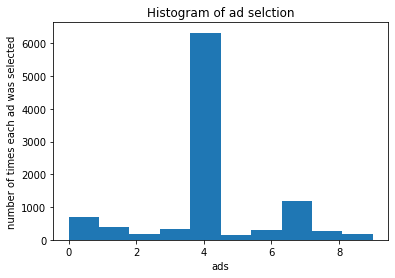

In [7]:
plt.hist(ads_selected)                                           # on y axis we get these
plt.title('Histogram of ad selction')
plt.xlabel('ads')
plt.ylabel('number of times each ad was selected')
plt.show()